<a href="https://colab.research.google.com/github/sudeep-009/Share-Price-Prediction/blob/dev/StockMarketPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Importing Data**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/My Projects/Stock Closing Price Prediction/data_YesBank_StockPrices.csv')

**Understanding Data**

In [4]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [6]:
print('The number of records present in the dataset {}'.format(df.shape[0]))
print('The number of features present in the dataset {}'.format(df.shape[1]))

The number of records present in the dataset 185
The number of features present in the dataset 5


In [7]:
print('Number of duplicate value present in the dataset is {}'.format(len(df[df.duplicated()])))

Number of duplicate value present in the dataset is 0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [9]:
df['Date'].unique()

array(['Jul-05', 'Aug-05', 'Sep-05', 'Oct-05', 'Nov-05', 'Dec-05',
       'Jan-06', 'Feb-06', 'Mar-06', 'Apr-06', 'May-06', 'Jun-06',
       'Jul-06', 'Aug-06', 'Sep-06', 'Oct-06', 'Nov-06', 'Dec-06',
       'Jan-07', 'Feb-07', 'Mar-07', 'Apr-07', 'May-07', 'Jun-07',
       'Jul-07', 'Aug-07', 'Sep-07', 'Oct-07', 'Nov-07', 'Dec-07',
       'Jan-08', 'Feb-08', 'Mar-08', 'Apr-08', 'May-08', 'Jun-08',
       'Jul-08', 'Aug-08', 'Sep-08', 'Oct-08', 'Nov-08', 'Dec-08',
       'Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09',
       'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09',
       'Jan-10', 'Feb-10', 'Mar-10', 'Apr-10', 'May-10', 'Jun-10',
       'Jul-10', 'Aug-10', 'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10',
       'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11',
       'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11',
       'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12',
       'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 'Nov-12', 'Dec-

**Findings:**
* 185 records are present in the dataset.
* 4 features are present in the dataset.
* No null values are present in the dataset.
* No duplicate records are present in the dataset.


In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


**Transforming date object into pandas datetime object**

In [10]:
# transforming date object into datetime format
df['Date'] = pd.to_datetime(df['Date'],format="%b-%y")


In [11]:
df.set_index('Date',inplace=True)

In [12]:
df = df.asfreq('D')

In [13]:
df.dropna(inplace=True)

In [14]:
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


### **EDA**

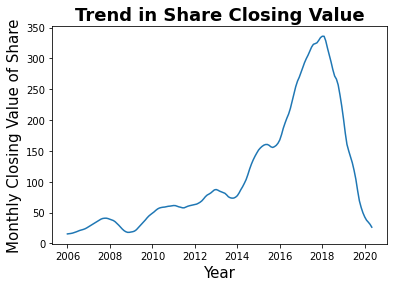

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.plot(seasonal_decompose(df.Close).trend)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Monthly Closing Value of Share', fontsize=15)
plt.title('Trend in Share Closing Value', weight='bold', fontsize=18)
plt.show()

**Finding:**

* Shares closing price shows increasing trend from 2006 to 2018.
* Shares closing price shows sharp decreasing trend from 2018 to 2020.

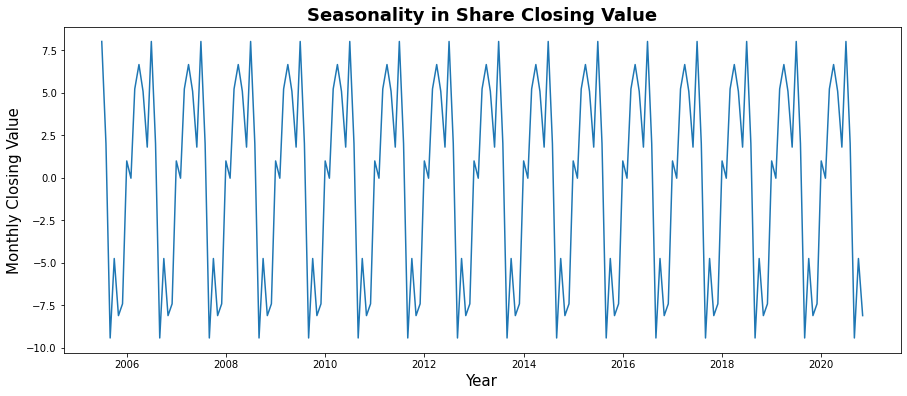

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(15,6))
plt.plot(seasonal_decompose(df.Close).seasonal)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Monthly Closing Value', fontsize=15)
plt.title('Seasonality in Share Closing Value', weight='bold', fontsize=18)
plt.show()

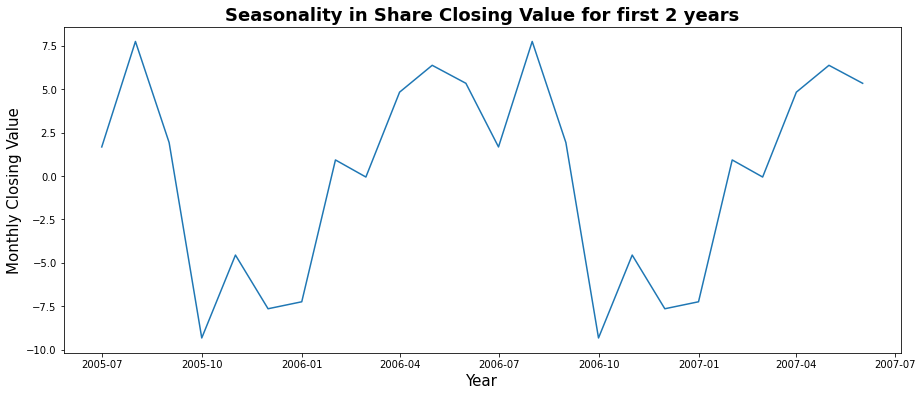

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(15,6))
plt.plot(seasonal_decompose(df.Open).seasonal.iloc[:24])
plt.xlabel('Year', fontsize=15)
plt.ylabel('Monthly Closing Value', fontsize=15)
plt.title('Seasonality in Share Closing Value for first 2 years', weight='bold', fontsize=18)
plt.show()

**Residual in Share Closing Value**

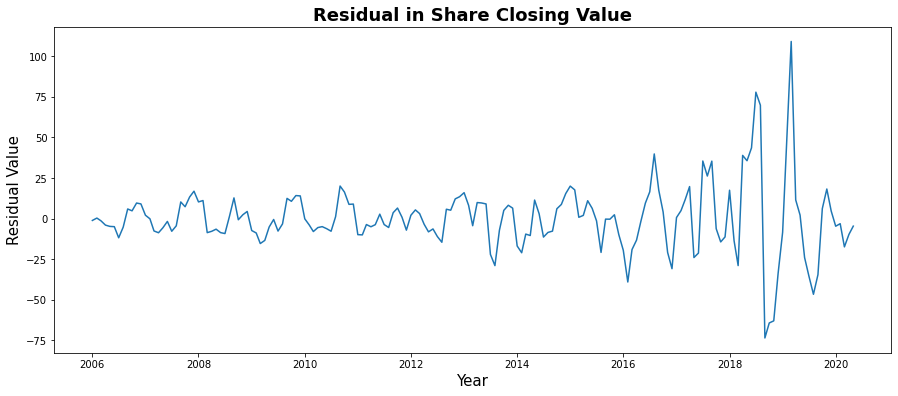

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(seasonal_decompose(df.Close).resid)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Residual Value', fontsize=15)
plt.title('Residual in Share Closing Value', weight='bold', fontsize=18)
plt.show()

### **Seasonal Decomposition**

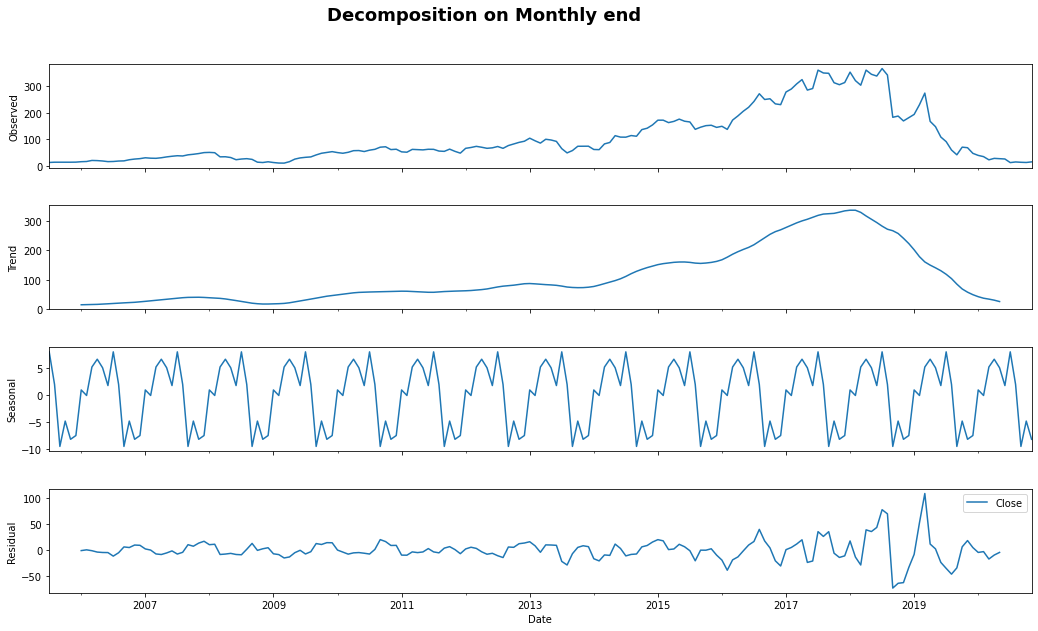

In [ ]:
monthly_end = df['Close'].resample('M').mean() # Here, DateOffset 'Q' represents Quarter end
fig = seasonal_decompose(monthly_end, model='additive').plot()
fig.set_size_inches((16,9))
plt.suptitle('Decomposition on Monthly end', weight='bold', fontsize=18, y=1.05)
plt.legend()
plt.show()

In [ ]:
month_end = df['Close'] # Here, DateOffset 'Q' represents Quarter end
month_end = pd.DataFrame(month_end)
month_end.head()

,Close
Date,
2005-07-01,12.46
2005-08-01,13.42
2005-09-01,13.30
2005-10-01,12.99
2005-11-01,13.41


In [ ]:
decomposeMonthEnd = np.round(seasonal_decompose(month_end, model='additive').seasonal, 2)
decomposeMonthEnd = pd.DataFrame(data=decomposeMonthEnd,index=month_end.index)

In [ ]:
decomposeMonthEnd.head()

,Close
Date,
2005-07-01,8.02
2005-08-01,2.01
2005-09-01,-9.44
2005-10-01,-4.76
2005-11-01,-8.12


**Deseasonalized quarter**

In [ ]:
deseasonalized_df = month_end - decomposeMonthEnd

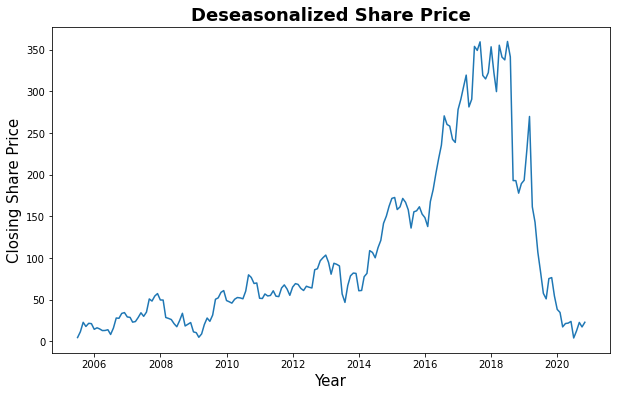

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(deseasonalized_df)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Closing Share Price', fontsize=15)
plt.title('Deseasonalized Share Price', weight='bold', fontsize=18)
plt.show()

**Smoothing Time Series**

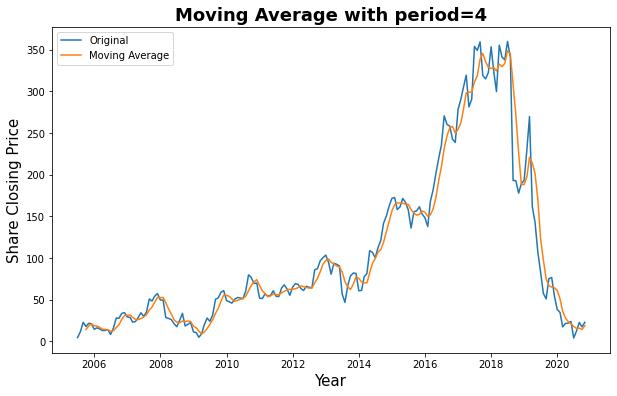

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(deseasonalized_df, label='Original')
plt.plot(deseasonalized_df.rolling(4, center=False).mean(), label='Moving Average')
plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Share Closing Price', fontsize=15)
plt.title('Moving Average with period=4', weight='bold', fontsize=18)
plt.show()

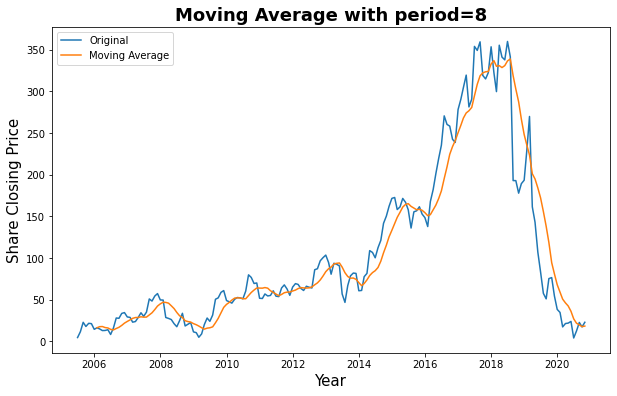

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(deseasonalized_df, label='Original')
plt.plot(deseasonalized_df.rolling(8, center=False).mean(), label='Moving Average')
plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Share Closing Price', fontsize=15)
plt.title('Moving Average with period=8', weight='bold', fontsize=18)
plt.show()

**Exponential Smoothing**

In [ ]:
monthly_end

Date
2005-07-31    12.46
2005-08-31    13.42
2005-09-30    13.30
2005-10-31    12.99
2005-11-30    13.41
              ...  
2020-07-31    11.95
2020-08-31    14.37
2020-09-30    13.15
2020-10-31    12.42
2020-11-30    14.67
Freq: M, Name: Close, Length: 185, dtype: float64

In [ ]:
# forecasting using exponential smoothing depends upon the most recent observed value and the past estimated values
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

for i in range(1, 11):
    model = SimpleExpSmoothing(monthly_end.iloc[:184]).fit(smoothing_level=i/10, optimized=False)
    forecasted_val = np.round(model.forecast(1)[0], 2)
    print('alpha = ', i/10, '| Forecasted value: ', forecasted_val, 
          '| MSE: ', np.round(mean_squared_error(np.array([monthly_end.iloc[184]]), np.array([forecasted_val])), 2))

alpha =  0.1 | Forecasted value:  65.73 | MSE:  2607.12
alpha =  0.2 | Forecasted value:  26.28 | MSE:  134.79
alpha =  0.3 | Forecasted value:  17.67 | MSE:  9.0
alpha =  0.4 | Forecasted value:  14.93 | MSE:  0.07
alpha =  0.5 | Forecasted value:  13.73 | MSE:  0.88
alpha =  0.6 | Forecasted value:  13.12 | MSE:  2.4
alpha =  0.7 | Forecasted value:  12.8 | MSE:  3.5
alpha =  0.8 | Forecasted value:  12.62 | MSE:  4.2
alpha =  0.9 | Forecasted value:  12.5 | MSE:  4.71
alpha =  1.0 | Forecasted value:  12.42 | MSE:  5.06


In [ ]:
import scipy as sp
# Function to find optimum value of alpha
def optimum_alpha(x):
    model = SimpleExpSmoothing(monthly_end.iloc[:184]).fit(smoothing_level=x, optimized = False)
    forecasted_val = np.round(model.forecast(1)[0], 2)
    mse = np.round(mean_squared_error(np.array([monthly_end.iloc[184]]), np.array([forecasted_val])), 2)
    print('alpha: ', np.round(x[0], 5), 'MSE: ', mse)
    return mse
optimum_alpha_result = sp.optimize.fmin(optimum_alpha, x0=1)
if optimum_alpha_result < 0:
    optimum_alpha_result = 0.001 # Least value, you can perform further optimization to improve it
optimum_alpha_result  

alpha:  1.0 MSE:  5.06
alpha:  1.05 MSE:  5.2
alpha:  0.95 MSE:  4.88
alpha:  0.9 MSE:  4.71
alpha:  0.8 MSE:  4.2
alpha:  0.7 MSE:  3.5
alpha:  0.5 MSE:  0.88
alpha:  0.3 MSE:  9.0
alpha:  0.3 MSE:  9.0
alpha:  0.6 MSE:  2.4
alpha:  0.4 MSE:  0.07
alpha:  0.3 MSE:  9.0
alpha:  0.3 MSE:  9.0
alpha:  0.45 MSE:  0.2
alpha:  0.35 MSE:  1.72
alpha:  0.425 MSE:  0.02
alpha:  0.45 MSE:  0.2
alpha:  0.4125 MSE:  0.0
alpha:  0.4 MSE:  0.07
alpha:  0.41875 MSE:  0.0
alpha:  0.40625 MSE:  0.02
alpha:  0.41562 MSE:  0.0
alpha:  0.41562 MSE:  0.0
alpha:  0.40937 MSE:  0.01
alpha:  0.41406 MSE:  0.0
alpha:  0.41406 MSE:  0.0
alpha:  0.41094 MSE:  0.01
alpha:  0.41328 MSE:  0.0
alpha:  0.41328 MSE:  0.0
alpha:  0.41172 MSE:  0.0
alpha:  0.41289 MSE:  0.0
alpha:  0.41289 MSE:  0.0
alpha:  0.41211 MSE:  0.0
alpha:  0.4127 MSE:  0.0
alpha:  0.4127 MSE:  0.0
alpha:  0.4123 MSE:  0.0
alpha:  0.4126 MSE:  0.0
alpha:  0.4126 MSE:  0.0
Optimization terminated successfully.
         Current function value: 0

array([0.4125])

In [ ]:
model = SimpleExpSmoothing(monthly_end.iloc[:184]).fit(smoothing_level=optimum_alpha_result, optimized = False)
forecasted_val = np.round(model.forecast(1)[0], 2)
mse = np.round(mean_squared_error(np.array([monthly_end.iloc[184]]), np.array([forecasted_val])), 2)
print('Alpha: ', optimum_alpha_result[0], 
      '\nActual value: ', monthly_end.iloc[184], 
      '\nForecasted value: ', np.round(forecasted_val).astype(int),
      '\nMean Squared Error: ', mse)

Alpha:  0.4124999999999995 
Actual value:  14.67 
Forecasted value:  15 
Mean Squared Error:  0.0


**Forecast the value of next few month**

In [ ]:
forecasted_data=np.round(model.forecast(13)).astype(int)
forecasted_data

2020-11-30    15
2020-12-31    15
2021-01-31    15
2021-02-28    15
2021-03-31    15
2021-04-30    15
2021-05-31    15
2021-06-30    15
2021-07-31    15
2021-08-31    15
2021-09-30    15
2021-10-31    15
2021-11-30    15
Freq: M, dtype: int64

The above methods are used for short term forecasting, for long term forecasting we need advanced methods.

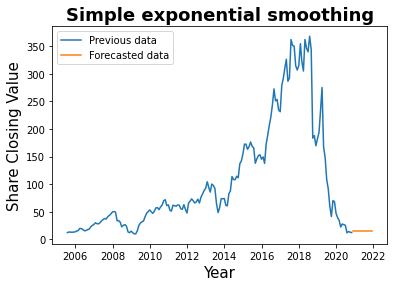

In [ ]:
# Visualizing the forecasted value
plt.plot(monthly_end.iloc[:184], label='Previous data')
plt.plot(forecasted_data, label='Forecasted data')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Share Closing Value', fontsize=15)
plt.title('Simple exponential smoothing', weight='bold', fontsize=18)
plt.legend()
plt.show()

### **Long term forecasting**

**Dickey Fuller test for checking the stationarity of data**

In [18]:
df_new = df.copy()

In [19]:
from statsmodels.tsa.stattools import adfuller
def dffunc(ts):
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series([dftest[0],dftest[1], dftest[4]["5%"],dftest[5]], index=['Test Statistic','p-value', 'Critical Value at 5%','AIC'])
    return(dfoutput)

dffunc(df_new.Close)

Test Statistic            -1.906409
p-value                    0.329052
Critical Value at 5%      -2.878696
AIC                     1511.478524
dtype: float64

As the series is not stationary we will take first order difference

In [20]:
dffunc(np.diff(df_new.Close,1))

Test Statistic            -2.056608
p-value                    0.262317
Critical Value at 5%      -2.878799
AIC                     1498.990081
dtype: float64

In [21]:
# second order difference
dffunc(np.diff(df_new.Close,2))

Test Statistic         -6.058352e+00
p-value                 1.229579e-07
Critical Value at 5%   -2.878799e+00
AIC                     1.493875e+03
dtype: float64

**Finding:** Second order difference makes the series stationary.

In [35]:
stationary_df = pd.DataFrame(data=np.concatenate(([np.nan,np.nan],np.diff(df_new.Close,2))),index=df_new.index,columns=['Close'])

(-200.0, 200.0)

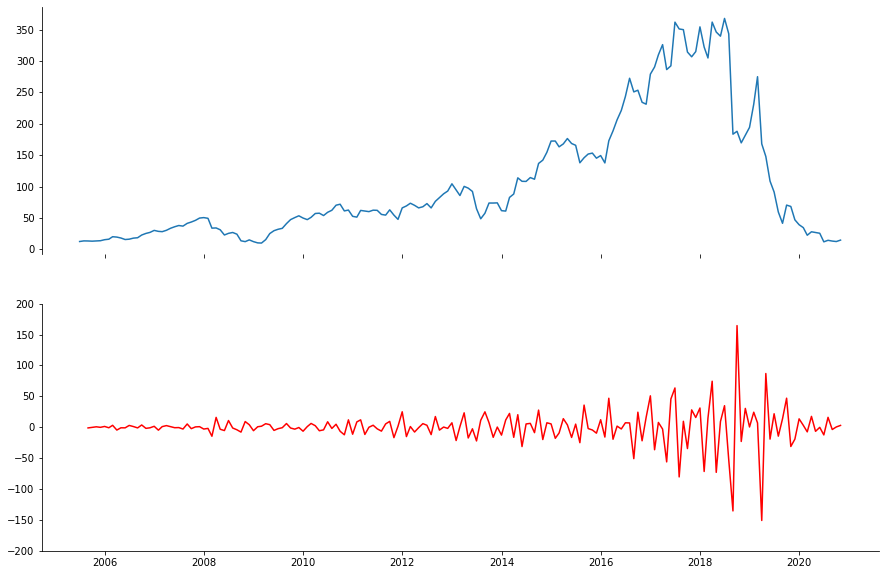

In [43]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(15,10))
ax1.plot(df_new.Close)
ax2.plot(stationary_df.Close,c='r')
# Removing bottom, top and right plot lines
ax1.spines['bottom'].set_visible(False) 
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylim([-200, 200])
